In [15]:
#!/usr/bin/env python
# coding: utf-8

import yfinance as yf  # api yfinance to get historical price and big firm recommendation
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
from scipy import signal
import matplotlib.pyplot as plt

In [4]:
df_riot = pd.read_csv('RIOT_final.csv')
df_mara = pd.read_csv('MARA_final.csv')
df_nasdaq = pd.read_csv('IXIC_final.csv')
df_BTC = pd.read_csv('BTC-USD_final.csv')

In [5]:
df_riot = pd.DataFrame(df_riot)
df_mara = pd.DataFrame(df_mara)
df_nasdaq = pd.DataFrame(df_nasdaq)
df_BTC = pd.DataFrame(df_BTC)

In [6]:
df_mara = df_mara.loc[df_mara['Date'].isin(df_riot['Date'])]
df_nasdaq = df_nasdaq.loc[df_nasdaq['Date'].isin(df_riot['Date'])]
df_BTC = df_BTC.loc[df_BTC['Date'].isin(df_riot['Date'])]

In [7]:
df_riot = df_riot.loc[df_riot['Date'].isin(df_BTC['Date'])]
df_mara = df_mara.loc[df_mara['Date'].isin(df_BTC['Date'])]
df_nasdaq = df_nasdaq.loc[df_nasdaq['Date'].isin(df_BTC['Date'])]

In [8]:
riot_price  = df_riot['Price'].tolist()
mara_price = df_mara['Price'].tolist()
nasdaq_price = df_nasdaq['Price'].tolist()
BTC_price = df_BTC['Price'].tolist()

In [9]:
def normalize(x):
    """
    Normalize the input to the range between 0 and 1
    """
    x = np.array(x)
    x_normalized = ((x - np.min(x)) / (np.max(x) - np.min(x))).tolist()
    return x_normalized

In [10]:
riot_price_normalize = normalize(riot_price)
mara_price_normalize = normalize(mara_price)
nasdaq_price_normalize = normalize(nasdaq_price)
BTC_price_normalize = normalize(BTC_price)

In [11]:
price_full = {
    'RIOT': riot_price_normalize,
    'MARA': mara_price_normalize,
    'Nasdaq': nasdaq_price_normalize,
    'BTC': BTC_price_normalize
}
df_full = pd.DataFrame(price_full)

In [12]:
df_full.corr()

,RIOT,MARA,Nasdaq,BTC
RIOT,1.000000,0.417263,0.542656,0.887414
MARA,0.417263,1.000000,-0.203139,0.190641
Nasdaq,0.542656,-0.203139,1.000000,0.823065
BTC,0.887414,0.190641,0.823065,1.000000


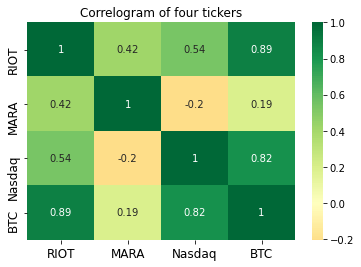

In [13]:
sns.heatmap(df_full.corr(), xticklabels=df_full.corr().columns, yticklabels=df_full.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Correlogram of four tickers', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [27]:
btc_riot = signal.correlate(riot_price_normalize, BTC_price_normalize, mode='full', method='direct')
btc_mara = signal.correlate(mara_price_normalize, BTC_price_normalize, mode='full', method='direct')
btc_nasdaq = signal.correlate(nasdaq_price_normalize, BTC_price_normalize, mode='full', method='direct')
nasdaq_riot = signal.correlate(riot_price_normalize, nasdaq_price_normalize, mode='full', method='direct')
nasdaq_mara = signal.correlate(mara_price_normalize, nasdaq_price_normalize, mode='full', method='direct')
mara_riot = signal.correlate(riot_price_normalize, mara_price_normalize, mode='full', method='direct')

In [25]:
btc_riot.shape

(5107,)

In [26]:
day_list = np.linspace(-2553,2553,5107)

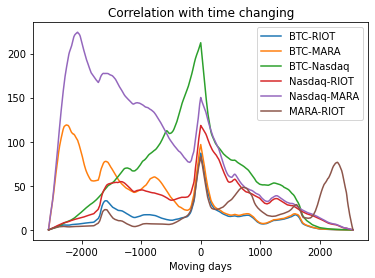

In [35]:
plt.plot(day_list, btc_riot, label = 'BTC-RIOT')
plt.plot(day_list, btc_mara, label = 'BTC-MARA')
plt.plot(day_list, btc_nasdaq, label = 'BTC-Nasdaq')
plt.plot(day_list, nasdaq_riot, label = 'Nasdaq-RIOT')
plt.plot(day_list, nasdaq_mara, label = 'Nasdaq-MARA')
plt.plot(day_list, mara_riot, label = 'MARA-RIOT')
plt.legend()
# plt.xlim(-100,100)
plt.xlabel('Moving days')
plt.title('Correlation with time changing')
plt.show()

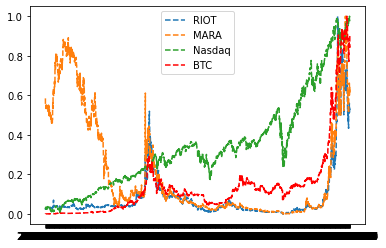

In [138]:
plt.plot(df_riot['Date'].tolist(), riot_price_normalize, '--', label = 'RIOT')
plt.plot(df_riot['Date'].tolist(), mara_price_normalize, '--', label = 'MARA')
plt.plot(df_riot['Date'].tolist(), nasdaq_price_normalize, '--', label = 'Nasdaq')
plt.plot(df_riot['Date'].tolist(), BTC_price_normalize, '--r', label = 'BTC')
plt.legend()

In [37]:
np.array(riot_price_normalize).shape

(2554,)

In [38]:
riot_price_normalize2 = riot_price_normalize[1000:]
mara_price_normalize2 = mara_price_normalize[1000:]
nasdaq_price_normalize2 = nasdaq_price_normalize[1000:]
BTC_price_normalize2 = BTC_price_normalize[1000:]

In [39]:
price_full = {
    'RIOT': riot_price_normalize2,
    'MARA': mara_price_normalize2,
    'Nasdaq': nasdaq_price_normalize2,
    'BTC': BTC_price_normalize2
}
df_full = pd.DataFrame(price_full)

In [40]:
df_full.corr()

,RIOT,MARA,Nasdaq,BTC
RIOT,1.000000,0.981699,0.684341,0.946425
MARA,0.981699,1.000000,0.691782,0.957546
Nasdaq,0.684341,0.691782,1.000000,0.823903
BTC,0.946425,0.957546,0.823903,1.000000


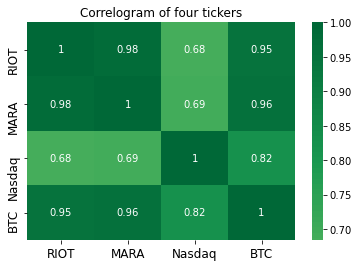

In [41]:
sns.heatmap(df_full.corr(), xticklabels=df_full.corr().columns, yticklabels=df_full.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Correlogram of four tickers', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

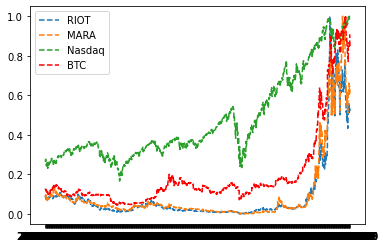

In [47]:
plt.plot(df_riot['Date'].tolist()[1000:], riot_price_normalize2, '--', label = 'RIOT')
plt.plot(df_riot['Date'].tolist()[1000:], mara_price_normalize2, '--', label = 'MARA')
plt.plot(df_riot['Date'].tolist()[1000:], nasdaq_price_normalize2, '--', label = 'Nasdaq')
plt.plot(df_riot['Date'].tolist()[1000:], BTC_price_normalize2, '--r', label = 'BTC')
plt.legend()

In [42]:
btc_riot = signal.correlate(riot_price_normalize2, BTC_price_normalize2, mode='full', method='direct')
btc_mara = signal.correlate(mara_price_normalize2, BTC_price_normalize2, mode='full', method='direct')
btc_nasdaq = signal.correlate(nasdaq_price_normalize2, BTC_price_normalize2, mode='full', method='direct')
nasdaq_riot = signal.correlate(riot_price_normalize2, nasdaq_price_normalize2, mode='full', method='direct')
nasdaq_mara = signal.correlate(mara_price_normalize2, nasdaq_price_normalize2, mode='full', method='direct')
mara_riot = signal.correlate(riot_price_normalize2, mara_price_normalize2, mode='full', method='direct')

In [43]:
btc_riot.shape

(3107,)

In [44]:
day_list = np.linspace(-1553,1553,3107)

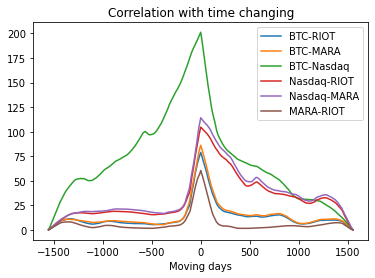

In [45]:
plt.plot(day_list, btc_riot, label = 'BTC-RIOT')
plt.plot(day_list, btc_mara, label = 'BTC-MARA')
plt.plot(day_list, btc_nasdaq, label = 'BTC-Nasdaq')
plt.plot(day_list, nasdaq_riot, label = 'Nasdaq-RIOT')
plt.plot(day_list, nasdaq_mara, label = 'Nasdaq-MARA')
plt.plot(day_list, mara_riot, label = 'MARA-RIOT')
plt.legend()
# plt.xlim(-100,100)
plt.xlabel('Moving days')
plt.title('Correlation with time changing')
plt.show()

In [71]:
df_cog = pd.read_csv('data/price_COG.csv')
df_dnv = pd.read_csv('data/price_DVN.csv')
df_hfc = pd.read_csv('data/price_HFC.csv')
df_nasdaq = pd.read_csv('data/price_IXIC.csv')

In [72]:
df_cog = pd.DataFrame(df_cog)
df_dnv = pd.DataFrame(df_dnv)
df_hfc = pd.DataFrame(df_hfc)
df_nasdaq = pd.DataFrame(df_nasdaq)

In [79]:
cog_price  = df_cog['Price'].tolist()
dnv_price = df_dnv['Price'].tolist()
nasdaq_price = df_nasdaq['Price'].tolist()
hfc_price = df_hfc['Price'].tolist()

In [80]:
cog_price_normalize = normalize(cog_price)
dnv_price_normalize = normalize(dnv_price)
nasdaq_price_normalize = normalize(nasdaq_price)
hfc_price_normalize = normalize(hfc_price)

In [81]:
price_full = {
    'COG': cog_price_normalize,
    'DNV': dnv_price_normalize,
    'Nasdaq': nasdaq_price_normalize,
    'HFC': hfc_price_normalize
}
df_full = pd.DataFrame(price_full)

In [82]:
df_full.corr()

,COG,DNV,Nasdaq,HFC
COG,1.000000,0.688898,-0.628980,0.192528
DNV,0.688898,1.000000,-0.703482,0.295255
Nasdaq,-0.628980,-0.703482,1.000000,-0.033101
HFC,0.192528,0.295255,-0.033101,1.000000


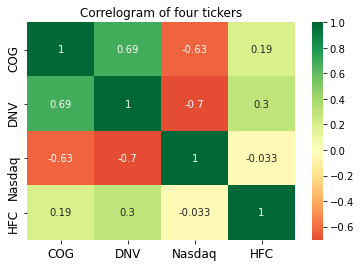

In [83]:
sns.heatmap(df_full.corr(), xticklabels=df_full.corr().columns, yticklabels=df_full.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Correlogram of four tickers', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

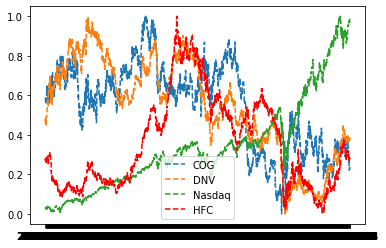

In [84]:
plt.plot(df_cog['Date'].tolist(), cog_price_normalize, '--', label = 'COG')
plt.plot(df_cog['Date'].tolist(), dnv_price_normalize, '--', label = 'DNV')
plt.plot(df_cog['Date'].tolist(), nasdaq_price_normalize, '--', label = 'Nasdaq')
plt.plot(df_cog['Date'].tolist(), hfc_price_normalize, '--r', label = 'HFC')
plt.legend()

In [85]:
cog_dnv = signal.correlate(cog_price_normalize, dnv_price_normalize, mode='full', method='direct')
cog_nasdaq = signal.correlate(cog_price_normalize, nasdaq_price_normalize, mode='full', method='direct')
cog_hfc = signal.correlate(cog_price_normalize, hfc_price_normalize, mode='full', method='direct')
dnv_nasdaq = signal.correlate(dnv_price_normalize, nasdaq_price_normalize, mode='full', method='direct')
dnv_hfc = signal.correlate(dnv_price_normalize, hfc_price_normalize, mode='full', method='direct')
nasdaq_hfc = signal.correlate(nasdaq_price_normalize, hfc_price_normalize, mode='full', method='direct')

In [86]:
cog_dnv.shape

(5079,)

In [87]:
day_list = np.linspace(-2539,2539,5079)

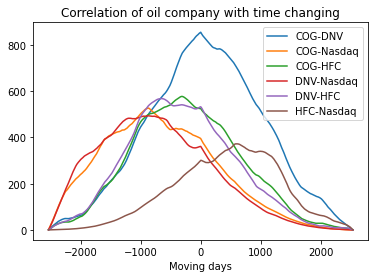

In [89]:
plt.plot(day_list, cog_dnv, label = 'COG-DNV')
plt.plot(day_list, cog_nasdaq, label = 'COG-Nasdaq')
plt.plot(day_list, cog_hfc, label = 'COG-HFC')
plt.plot(day_list, dnv_nasdaq, label = 'DNV-Nasdaq')
plt.plot(day_list, dnv_hfc, label = 'DNV-HFC')
plt.plot(day_list, nasdaq_hfc, label = 'HFC-Nasdaq')
plt.legend()
# plt.xlim(-100,100)
plt.xlabel('Moving days')
plt.title('Correlation of oil company with time changing')
plt.show()